In [2]:
from PIL import Image
from bird_utils.datasets import get_basic_transform, get_datasets
from bird_utils.models import get_vgg_19, get_vgg_16, get_vgg_13, get_vgg_11, get_frozen_model
from bird_utils.test import get_predictions, predictions_to_csv, get_name
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from torchvision.transforms import transforms

import random
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)  # this should print out CUDA

cuda


In [4]:
test_transform = transforms.Compose([
    # Data augmentation
    transforms.Resize(size = 224),
    transforms.CenterCrop(size = 224),
    transforms.ToTensor(),

    # data-standardization for imgnet dataset
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
])

In [5]:
TRAIN_ROOT_DIR = "/home/dubcar/bird_classifier/birds23sp/birds/train"

train_set, val_set, num_classes = get_datasets(
    TRAIN_ROOT_DIR,
    test_transform
)

In [6]:
TEST_ROOT_DIR = "/home/dubcar/bird_classifier/birds23sp/birds/test"

test_set = datasets.ImageFolder(
    root = TEST_ROOT_DIR,
    transform = test_transform
)

test_loader = DataLoader(test_set, batch_size = 1, shuffle = False)

In [7]:
test_names = [sample[0] for sample in test_set.samples]

In [9]:
VGG_19_PATH = "/home/dubcar/bird_classifier/model_parameters/vgg19_best.pth"

vgg19 = get_vgg_19(num_classes = num_classes)
vgg19.load_state_dict(torch.load(VGG_19_PATH))
vgg19.to(DEVICE)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [10]:
name_image_pairs = []

for i, (batch_input, batch_output) in enumerate(test_loader):
    batch_input = batch_input.to(DEVICE)

    y_hat = vgg19(batch_input)
    label = torch.argmax(y_hat, dim = 1).item()

    img = Image.open(test_names[i])

    name_image_pairs.append((get_name(label), img))

    if i >= 100:
        break
    

Northern Shrike



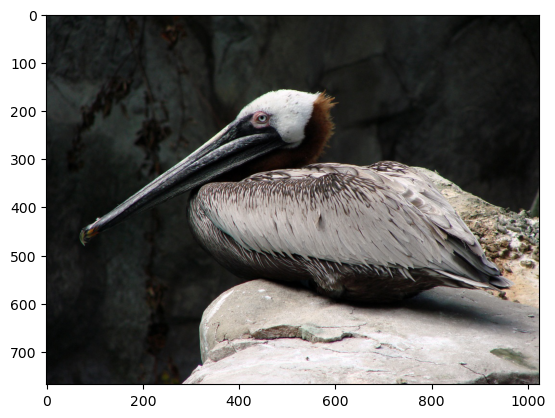

In [15]:
curr_name, curr_img = random.choice(name_image_pairs)

print(curr_name)

plt.imshow(curr_img)